# Cassandra with Python

This article is for people who are beginners-intermediate level skilled with Cassandra. But, also retain their love of Python and want to use the same while working with Cassandra.
This will be an exhaustive tutorial, so don't worry if you're completely new to Cassandra. You'll learn how to setup your Cassandra cluster and use it from Python.

> Installation of Cassandra (Debian based).

> Using cqlsh and exporting external data to your cluster/tables.

> Manipulation and access of data through Python.

# Cassandra

From wiki, 

*Apache Cassandra is a free and open-source distributed NoSQL database management system designed to handle large amounts of data across many commodity servers, providing high availability with no single point of failure. Cassandra offers robust support for clusters spanning multiple datacenters, with asynchronous masterless replication allowing low latency operations for all clients.*

*Cassandra also places a high value on performance. In 2012, University of Toronto researchers studying NoSQL systems concluded that "In terms of scalability, there is a clear winner throughout our experiments. Cassandra achieves the highest throughput for the maximum number of nodes in all experiments" although "this comes at the price of high write and read latencies."*

Cassandra Query Language or CQL is a data management language akin to SQL. CQL was introduced in version 0.8. Cqlsh is a Python based utility that enables you to execute CQL. A cqlsh prompt can be obtained by simply executing the cqlsh utility.

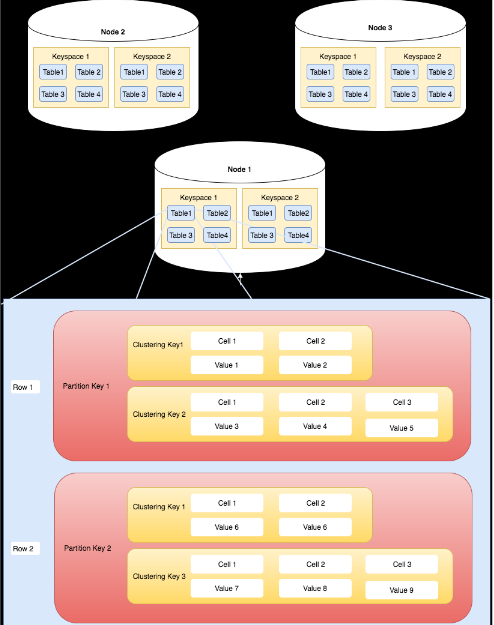

In [3]:
from IPython.display import Image
Image(filename='/home/abhinavralhan/Desktop/datasci/blog/pic2.png')

# Installation and Configuring Cassandra

References:

Cassandra - http://cassandra.apache.org/download/

Before starting, check if Java is up and running on your system. Also, ensure if the path variable has been set.

> !java -version #ensures Java is installed and returns it's version 



> !echo $JAVA_HOME

If the above command does not return anything, it means Java's path has not been set and you need to set it using the commands below in you ~/.bashrc

> export JAVA_HOME = /usr/lib/java/jdk1.8.0_161 (change your version if needed)

> export PATH = \$PATH:\$JAVA_HOME/bin

This ensures your JAVA is configured properly. Next, download Cassandra

> ! wget http://redrockdigimark.com/apachemirror/cassandra/3.11.2/apache-cassandra-3.11.2-bin.tar.gz

> tar -xvfz apache-cassandra-3.11.2-bin.tar.gz

> mkdir ~/cassandra

> mv apache-cassandra-3.11.2/ ~/cassandra

Again, set path variables, this time for Cassandra, by adding the following lines to ~/.bashrc,

> nano ~/.bashrc

>  export CASSANDRA_HOME = ~/cassandra

>  export PATH = \$PATH:\$CASSANDRA_HOME/bin

> mkdir /var/lib/cassandra

> chmod 755 /var/lib/cassandra

> mkdir /var/log/cassandra

> chmod 755 /var/log/cassandra

Configuring Cassandra settings,

> gedit ~/cassandra/apache-cassandra-3.11.2/conf/cassandra.yaml

Uncomment following lines from cassandra.yaml file. This allows Cassandra to place all data files in /var/lib/cassandra/data


>#data_file_directories:

>#- /var/lib/cassandra/data

>#commitlog_directory: /var/lib/cassandra/commitlog


Now, to *finally* run cassandra,

> cd ~/cassandra/apache-cassandra-3.11.2/pylib

> python setup.py install

> cassandra

All these commands should allow you to run cassandra smoothly. Please comment below, if otherwise.

# Using cqlsh and importing/exporting data

References:

Cqlsh - 

http://cassandra.apache.org/doc/latest/tools/cqlsh.html

https://www.tutorialspoint.com/cassandra/cassandra_cqlsh.htm

Run cqlsh by writing cqlsh in the terminal. This will open up a CQL (Cassandra Query Language) terminal, which means you're good to go, and code.

Clusters in Cassandra are also referred to as keyspaces. You should start by creating one...

> cqlsh> CREATE KEYSPACE myKeyspace WITH replication = {'class':'SimpleStrategy', 'replication_factor' : 3};

> cqlsh> USE myKeyspace;

Cassandra allows for three strategies while creating a keyspace for replication. Simple Strategy, Network Topology Strategy, Old Network Topology Strategy.

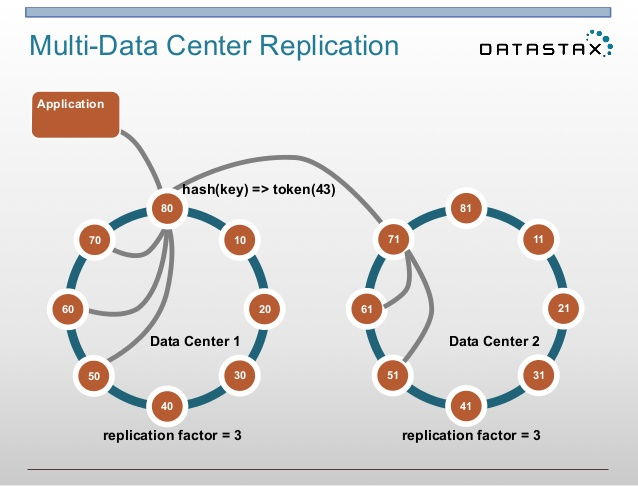

In [7]:
Image(filename='/home/abhinavralhan/Desktop/datasci/blog/pic4.jpg')

Creating a table and adding values to it

> cqlsh> CREATE TABLE myKeyspace.firsttable (id UUID PRIMARY KEY, lastname text, firstname text);

> cqlsh> INSERT INTO myKeyspace.firsttable (id, lastname, firstname) 

>     ... VALUES (5b6962dd-3f90-4c93-8f61-eabfa4a803e2, 'VOS','Marianne');


> cqlsh> INSERT INTO myKeyspace.firsttable (id, lastname, firstname) 

>     ... VALUES (e7cd5752-bc0d-4157-a80f-7523add8dbcd, 'VAN DER BREGGEN','Anna');


> cqlsh> INSERT INTO myKeyspace.firsttable (id, lastname, firstname) 

>     ... VALUES (e7ae5cf3-d358-4d99-b900-85902fda9bb0, 'FRAME','Alex');


> cqlsh> INSERT INTO myKeyspace.firsttable (id, lastname, firstname) 

>     ... VALUES (220844bf-4860-49d6-9a4b-6b5d3a79cbfb, 'TIRALONGO','Paolo');



Second table,


> cqlsh> CREATE TABLE myKeyspace.secondtable (no int PRIMARY KEY, name text, city text, phone varint);

> cqlsh> INSERT INTO myKeyspace.secondtable JSON '{

> ... "no" : "001", 

> ... "name" : "Aaron Ramsey",

> ... "city" : "Caephirlly, Wales",

> ... "phone" : "9999912345" }';

To display all records,

> cqlsh> SELECT * FROM myKeyspace.firsttable;

To delete records

> cqlsh> TRUNCATE myKeyspace.firsttable;       #removes all records

> cqlsh> DELETE myKeyspace.phone FROM myKeyspace.secondtable 

> ... WHERE student_roll_no=001;

Update records

> cqlsh> UPDATE myKeyspace.secondtable SET city = 'London' WHERE no = 001;

To check your consistency level simply execute, what you should see "Current consistency level is ONE."

> cqlsh> CONSISTENCY  

Importing CSV data 

> cqlsh> COPY myKeyspace.firsttable (id, firstname, lastname) FROM '~/input.csv' WITH HEADER = TRUE;

Here, it is expected that you provide a CSV file having three columns (id, firstname, lastname).

If the first line of your CSV file does not contain data, HEADER should be set to TRUE, or else, FALSE.

# Manipulation and access of data through Python

References:

cassandra.cluster() - https://datastax.github.io/python-driver/api/cassandra/cluster.html

Now before starting, ensure you have the cassandra-driver installed or install via pip:

    sudo pip install cassandra-driver

In [56]:
import cassandra

In [57]:
#Create a connection to a Cassandra instance on a local machine (localhost or 127.0.0.1).
from cassandra.cluster import Cluster
cluster = Cluster()

By default, cassandra creates a 'Test Cluster' on localhost (127.0.0.1) on port 9042 as set by rpc_address in cassandra.yaml file. An important purpose of Cassandra can to be distribute your data across multiple clusters and you might want to add more IPs/ports for the same.

> cluster = Cluster([IP1, IP2])

 To establish the connections and execution of queries, a session is created:
> session = cluster.connect('myKeyspace')

 The keyspace of the session can be changed using set_keyspace():
> session.set_keyspace('myKeyspace1')

 All commands which we learned for CQL via cqlsh can be implemented using execute()

> session.execute('USE myKeyspace1')

> session.execute("CREATE KEYSPACE ...")

> rows = session.execute('SELECT * FROM myKeyspace.firsttable;')

> for record in rows:

>    print(record.id, record.firstname, record.lastname)

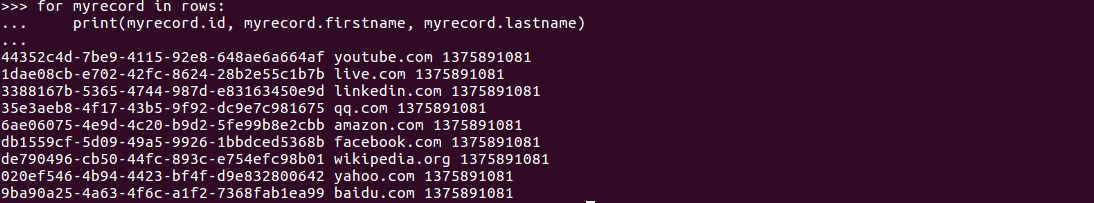

In [5]:
Image(filename='/home/abhinavralhan/Desktop/datasci/blog/pic.png')

> cluster.shutdown()

Cluster and Session also provide context management functions which implicitly handle shutdown when leaving scope.

There are plenty more operations supported by the Python driver for Cassandra, and I'd definitely suggest you to go take a look at them using the link in the reference.

## Migrating to Cassandra

There are plenty of popular alternatives to Cassandra which people currently use, like say Mongo or SQL, but slowly IT professionals have found Apache Cassandra as a standout among other NoSQL offerings, for the following technical reasons:
    
• *Massively scalable architecture* –
Cassandra’s masterless, peer-to-peer architecture overcomes the limitations of master-slave designs 
and allows for both high availability and massive salability. Cassandra is the acknowledged NoSQL leader when it comes to comfortably scaling to terabytes or petabytes of data, while maintaining industry-leading write and read performance.

• *Linear scale performance* –
Nodes added to a Cassandra cluster (all done online) increase the throughput of a database in a  predictable, linear fashion for both read and write operations, even in the cloud where such predictability can be difficult to ensure.

• *Continuous availability* –
Data is replicated to multiple nodes in a Cassandra database cluster to protect from loss during node failure and provide continuous availability with no downtime.

• *Transparent fault detection and recovery* –
Cassandra clusters can grow into the hundreds or thousands of nodes. Because Cassandra was designed for commodity servers, machine failure is expected. Cassandra utilizes gossip protocols to detect machine failure and recover when a machine is brought back into the cluster–all without the application noticing.

• *Flexible, dynamic schema data modeling* –
Cassandra offers the organization of a traditional RDBMS table layout combined with the flexibility and power of no stringent structure requirements. This allows data to be dynamically stored as needed without performance penalty for changes that occur. In addition, Cassandra can store structured, semi-structured, and unstructured data.

• *Guaranteed data safety* –
Cassandra far exceeds other systems on write performance due to its append-only commit log while always ensuring durability. Users must no longer trade off durability to keep up with immense write streams. Data is absolutely safe in Cassandra; data loss is not possible.

• *Distributed, location independence design* –
Cassandra’s architecture avoids the hot spots and read/write issues found in master-slave designs. Users can have a highly distributed database (e.g., multi-geography, multi-data center) and read or write to any node in a cluster without concern over what node is being accessed.

• *Tunable data consistency* –
Cassandra offers flexible data consistency on a cluster, data center, or individual I/O operation basis. Very strong or eventual data consistency among all participating nodes can be set globally and also controlled on a per-operation basis (e.g., per INSERT, per UPDATE)

• *Multi-data center replication* –
Whether it’s keeping data in multiple locations for disaster recovery scenarios or locating data physically near its end users for fast performance, Cassandra offers support for multiple data centers. Administrators simply configure how many copies of the data they want in each data center, and Cassandra handles the rest–replicating the data automatically. Cassandra is also rack-aware and can keep replicas of data stored on different physical racks, which helps ensure uptime in the case of single rack failures.

• *Cloud-enabled* –
Cassandra’s architecture maximizes the benefits of running in the cloud. Also, Cassandra allows for hybrid data distribution where some data can be kept on-premise and some in the cloud.

• *Data compression* –
Cassandra supplies built-in data compression, with up to an 80 percent reduction in raw data footprint. More importantly, Cassandra’s compression results in no performance penalty, with 
some use cases showing actual read/write operations speeding up due to less physical I/O being required. 

• *CQL (Cassandra Query Language)* –
Cassandra provides a SQL-like language called CQL that mirrors SQL’s DDL, DML, and SELECT syntax. 
CQL greatly decreases the learning curve for those coming from RDBMS systems because they can use familiar syntax for all object creation and data access operations.

• *No caching layer required* –
Cassandra offers caching on each of its nodes. Coupled with Cassandra’s scalability characteristics, nodes can be incrementally added to the cluster to keep as much data in memory as needed. The result is that there is no need for a separate caching layer. 

• *No special hardware needed* –
Cassandra runs on commodity machines and requires no expensive or special hardware.

• *Incremental and elastic expansion* –
The Cassandra ring allows online node additions. Because of Cassandra’s fully distributed architecture, every node type is the same, which means clusters can grow as needed without any complex architecture decisions.

• *Simple install and setup* –
Cassandra can be downloaded and installed in minutes, even for multi-cluster installs.

• *Ready for developers* –
Cassandra has drivers and client libraries for all the popular development languages (e.g., Java, Python)

Now coming to the how, I hope you realise that you would most probably need to remodel your data model if you're coming from SQL or even other NoSql databases. Mainly it depends on how you're eventually going to use data and requirements. 

Also, you should take a look at that this nifty tool which would help you ease the process of migration

> https://github.com/Cobliteam/cassandra-migrate

That's it for now guys, for learning more on Cassandra, take a look at some references here: 

> https://docs.datastax.com/en/cql/3.3/cql/cql_reference/cqlshCopy.html

> https://datastax.github.io/python-driver/api/cassandra/query.html

Do leave a comment below for any queries. Or, here https://twitter.com/abhinavr8